In [30]:
import logging
import lift
from tqdm.auto import tqdm
from scipy.sparse import csr_matrix, triu
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps

from lenskit import crossfold as xf
from lenskit.datasets import MovieLens
from lenskit import topn , batch , util
from lenskit.algorithms import Recommender, als, basic, bias, item_knn, user_knn, svd, tf
from lenskit.batch import predict, recommend

from lenskit.metrics.predict import rmse
from lenskit.topn import RecListAnalysis
from lenskit.metrics.topn import ndcg
from binpickle import dump, load

from lenskit.algorithms.tf import BPR

import sys, getopt


# Rec-visualization

At the end of this, you should have two bar charts or dot plots: one showing RMSE for each
rating prediction algorithm, and another showing mean nDCG for each of the algorithms.

ONE PER ALGORITHM not one for each partition

In [69]:
#recs = pd.read_csv('Trained_Models/popular.csv', low_memory=False)
#test = pd.read_csv('test_master.csv', low_memory=False)

In [91]:
df_ndcg = pd.read_csv('ndcg.csv')
df_rmse = pd.read_csv('rmse.csv')

,alg name,ndcg
0,popular,0.057455
1,bias,0.000000
2,bias,0.000000
3,popular,0.057455
4,bias,0.000000
5,user-user,0.000208
6,item-item,0.000734
7,item-item sum,0.030326
8,explicit mf,0.019364
9,svd,0.026944


<AxesSubplot:title={'center':'Average nDCG'}, xlabel='alg name'>

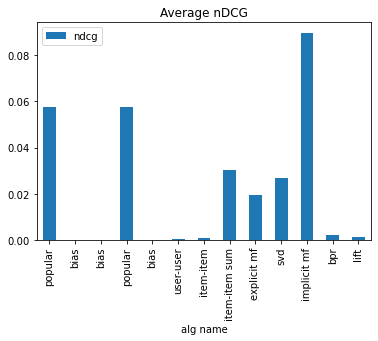

In [92]:
df_ndcg.set_index('alg name').plot(kind="bar", title = 'Average nDCG')

<AxesSubplot:title={'center':'rmse'}, xlabel='alg name'>

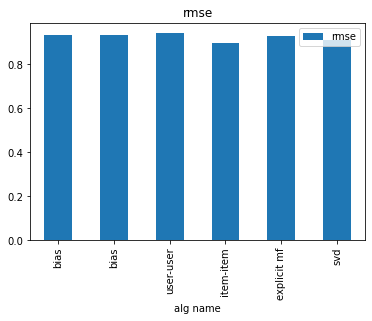

In [95]:
df_rmse.set_index('alg name').plot(kind="bar", title = 'rmse')

For item-item similarity it is saying TopN object has no attribute 'item_features_'. Also I am not fully understanding, The write up states for each alogrithm for each partition do the following. That means within each partition we create the algorithm and train it. So at the end of the training we have all of the recommendations but not an instance of the final model. Unless we do item similarity within the for loop. Which I tried and it still threw the error of no attribute item_features.

For Bias MF I ran into the same issue. The odd thing is is that alg is labeled as als.BiasedMF or item_knn.ItemItem they are not TopN objects, so I am unsure where this error is actually stemming from.